# C964 Project

### Import Python Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# Load the CSV Data

# Only keep 20K rows, normally hase 370K, too much for my machine to handle
# pd.read_csv("FILEPATH", nrows=20000)
# pd.to_csv("NEW_CSV_FILE.csv", index=False)

# Original link to CSV: https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format
uppercaseAlphabetCharactersDataFrame = pd.read_csv("data/uppercase-english-alphabet-handwritten-data-20000-rows.csv")
uppercaseAlphabetCharactersDataFrame.head()

0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]

In [3]:
uppercaseAlphabetCharactersDataFrame.shape

(20000, 785)

In [4]:
# Check for missing values (NaN - Not a number / null) 
# Check if data is all numerical, (int64, float, ...)
uppercaseAlphabetCharactersDataFrame.isna().sum()

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.644    0
0.645    0
0.646    0
0.647    0
0.648    0
Length: 785, dtype: int64

In [5]:
# Create x and y
x = uppercaseAlphabetCharactersDataFrame.drop(uppercaseAlphabetCharactersDataFrame.columns[0], axis=1) # Data / Features
y = uppercaseAlphabetCharactersDataFrame.iloc[:, 0].copy() # Select column with index 0, Label, A-Z

# Change from DataFrame type to NumPy Array
x = np.array(x)
y = np.array(y)

In [6]:
x.shape

(20000, 784)

In [7]:
y.shape

(20000,)

### Show a random letter, an example image

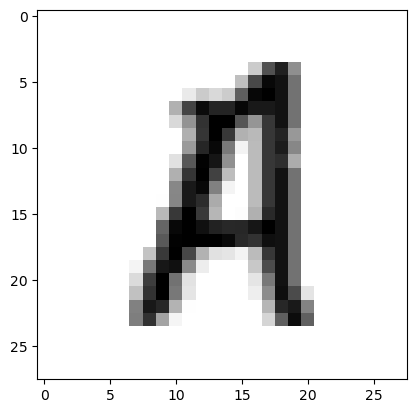

In [8]:
exampleLetterData = x[245] # encoded in integers, representing grayscale color
exampleLetterImage = exampleLetterData.reshape(28,28) # original images are 28 pixels x 28 pixels

# Use MatPlotLib to show an image
plt.imshow(exampleLetterImage,cmap=matplotlib.cm.binary,interpolation="nearest")

In [9]:
# What letter is the random image?
label = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}
label[y[245]]

'A'

### Split the training and testing data

In [10]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, stratify=y, random_state=42, test_size=0.2)

### Train the K-Nearest Neighbor Estimator / Model

In [11]:
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
ncaPipeline = Pipeline([('nca', nca), ('knn', knn)])
ncaPipeline.fit(xTrain, yTrain)

Pipeline(steps=[('nca', NeighborhoodComponentsAnalysis(random_state=42)),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [12]:
ncaPipeline.score(xTest, yTest)

0.99

In [13]:
xTest

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Save the trained model

In [14]:
import pickle

# save the sci-kit learn classifier
with open("data/uppercase-english-alphabet-handwritten.pkl", "wb") as fid:
    pickle.dump(ncaPipeline, fid)

### Load the trained model

In [15]:
with open("data/uppercase-english-alphabet-handwritten.pkl", "rb") as fid:
    ncaPipelineLoaded = pickle.load(fid)

### Verify that the loaded classifier works 

In [16]:
ncaPipeline.score(xTest, yTest)

0.99

### Upload some new test images

1. Covert the image to grayscale
2. Scale to 28 pixels height, By X * 28 pixels width
3. Convert to NumPy Array
4. Test the model score with the new image

In [17]:
import cv2

### Display an example image, unmodified

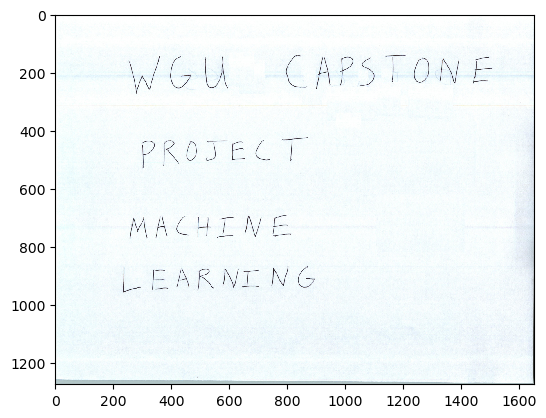

In [18]:
# load an example image
numPyImageArray = plt.imread("images/scanned-images/pages-1.jpg")

# Use MatPlotLib to display an image
plt.imshow(numPyImageArray, cmap=matplotlib.cm.binary,interpolation="nearest")

### Convert the example image to grayscale

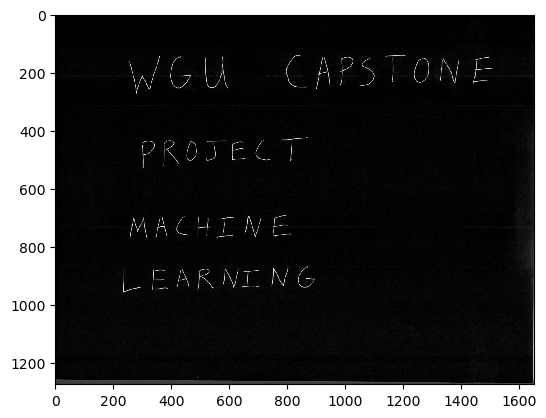

In [19]:
grayscaleImage = cv2.cvtColor(numPyImageArray, cv2.COLOR_BGR2GRAY)

# Use MatPlotLib to display an image
plt.imshow(grayscaleImage, cmap=matplotlib.cm.binary,interpolation="nearest")

### Apply a Gausian blur image filter

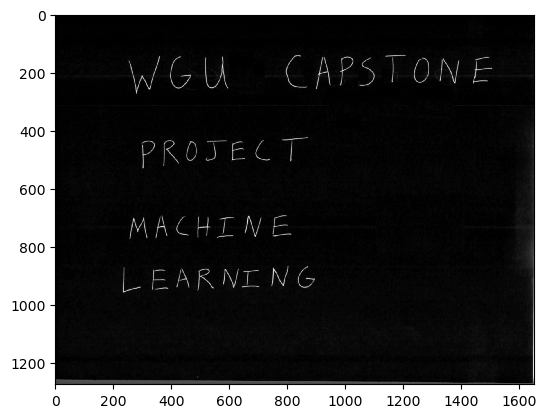

In [20]:
blurredImage = cv2.GaussianBlur(grayscaleImage, (5, 5), 0)

# Use MatPlotLib to display an image
plt.imshow(blurredImage, cmap=matplotlib.cm.binary,interpolation="nearest")

In [21]:
# perform edge detection, find contours in the edge map,
edgeDetectionImage = cv2.Canny(blurredImage, 30, 150)
imageContours = cv2.findContours(edgeDetectionImage.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [22]:
import imutils
from imutils.contours import sort_contours

In [23]:
# sort the resulting contours from left-to-right
imageContours = imutils.grab_contours(imageContours)

In [24]:
imageContours = sort_contours(imageContours, method="left-to-right")[0]

In [25]:
import bounding_box_image as bbi

In [26]:
charactersList = bbi.predictAnImage("data/uppercase-english-alphabet-handwritten.pkl", numPyImageArray)

In [27]:
len(charactersList)

40

In [51]:
j = 0

for (padded, (x, y, width, height)) in charactersList:
    if j == 11:
        newArray = np.reshape(padded, (784, 1))
        # Create list of column names with the format "0.N" (from 1 to N)
        #paddedColumnNames = ['0.' + str(i) for i in np.arange(padded.shape[0]) + 0]
        # Declare pandas.DataFrame object
        paddedDataFrame = pd.DataFrame(newArray)
        
        #print(type(padded))
        #print(type(padded))
        #print(type(x[245]))
        #padded = padded.astype("int64")
        #padded.reset_index().melt('index', var_name='col').set_index('index')[['col']]
        #padded = padded.reshape(-1, 1)
        #padded = np.expand_dims(padded, axis=-1)
        print(len(padded[0]))
        print(len(xTest[0]))
        print(ncaPipelineLoaded.predict(xTest[0]))
    j += 1

28
784


ValueError: Expected 2D array, got 1D array instead:
array=[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0  99 240 110   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  21 130 250 255 242  46   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  72  94 195 255 255 255 255 227   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  61 246 255 255 255 243 184 255
 253  98   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 176 255 255 255 243  92   6 174 255 117   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  17 215 255 255 217  98   0
   0 153 255 117   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 101 255 255 255  73   0   0  20 223 255 137   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  55 239 255 255 255  73
   0   0  29 255 255 252  92   0   0   0   0   0   0   0   0   0   0   0
   0  70  94  63 184 255 255 255 224 113  13  13 110 255 255 255 248   0
   0   0   0   0   0   0   0   0   0   0   0 240 255 255 255 255 255 255
 255 255 232 209 255 255 255 182  59   0   0   0   0   0   0   0   0   0
   0   0  55 247 255 255 255 255 255 255 255 255  80  19 210 255 247  55
   0   0   0   0   0   0   0   0   0   0   0   0   6 241 255 255 255 255
 255 255 255  82   4   0 160 255 255 117   0   0   0   0   0   0   0   0
   0   0   0   0   0 240 255 255 255 255 180 161 161  46   0   0 160 255
 255 117   0   0   0   0   0   0   0   0   0   0   0   0  98 253 255 255
 255 188   8   0   0   0   0   0 160 255 255 117   0   0   0   0   0   0
   0   0   0   0   0  33 222 255 255 255 232  60   0   0   0   0   0   0
 160 255 255 117   0   0   0   0   0   0   0   0   0   0   0 124 255 255
 255 255 140   0   0   0   0   0   0   8 180 255 252  92   0   0   0   0
   0   0   0   0   0   0   0 145 255 255 255 169  12   0   0   0   0   0
   0  36 255 255 240   0   0   0   0   0   0   0   0   0   0   0   0 172
 255 255 244  26   0   0   0   0   0   0   0 105 255 253 146   0   0   0
   0   0   0   0   0   0   0   0   0 117 242 248  76   0   0   0   0   0
   0   0   0  15 200 245  58   0   0   0   0   0   0   0   0   0   0   0
   0   0   0  62   0   0   0   0   0   0   0   0   0   0 145 110   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.